In [86]:
%load_ext autoreload
%autoreload 2 
import sys
sys.path.append("../../../xapres/")
import xapres as xa
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from apres import ApRESFile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%%timeit
dat_file = '../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'
burstnum=0
with ApRESFile(dat_file) as f: 
    for burst in f.read():
        header = burst.header
        #print(f'header: header_start = {burst.header_start}')
        #print(f'header: data_start = {burst.data_start}')
        #print(f'header: data_dim_keys = {burst.data_dim_keys}')
        #print(f'header: data_shape = {burst.data_shape}')
        #print(f'header: dict = ')
        #print(header)


        data = burst.data
        #print(f'data: len(data) = {len(data)}')
        #print(f'data: data.size = {data.size}')
        #print(f'data: data.shape = {data.shape}')
        burstnum+=1
        #print(f'burstnum = {burstnum}')


33452.53601972451
33451.19264455888
33449.926378090546
33449.11836516587
33449.04925751856
33449.76972950676
33449.92053636159
33450.24142771431
33450.05944601385
33449.898748156294
33449.67987737807
33449.27877553061
33449.125216244596
33452.53601972451
33451.19264455888
33449.926378090546
33449.11836516587
33449.04925751856
33449.76972950676
33449.92053636159
33450.24142771431
33450.05944601385
33449.898748156294
33449.67987737807
33449.27877553061
33449.125216244596
33452.53601972451
33451.19264455888
33449.926378090546
33449.11836516587
33449.04925751856
33449.76972950676
33449.92053636159
33450.24142771431
33450.05944601385
33449.898748156294
33449.67987737807
33449.27877553061
33449.125216244596
33452.53601972451
33451.19264455888
33449.926378090546
33449.11836516587
33449.04925751856
33449.76972950676
33449.92053636159
33450.24142771431
33450.05944601385
33449.898748156294
33449.67987737807
33449.27877553061
33449.125216244596
33452.53601972451
33451.19264455888
33449.9263780905

In [12]:
header['Latitude']

'69.2175'

In [124]:

xapres_Loaded = xa.load.generate_xarray('../../data/sample/multi-burst-dat-file/', computeProfiles=False)


  0%|          | 0/1 [00:00<?, ?it/s]


AttributeError: 'ApRESBurst' object has no attribute 'BurstNo'

In [ ]:
dat_file = '../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'
burstnum=0
with ApRESFile(dat_file) as f: 
    for burst in f.read():
        data = burst.data


In [47]:
with ApRESFile(dat_file) as f: 
    f.read()
len(f.bursts)

13

In [ ]:
fp = open(dat_file, 'r', encoding='latin-1')
fp

<_io.TextIOWrapper name='../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT' mode='r' encoding='latin-1'>

In [ ]:
self.fp = open(self.path, mode, encoding=self.DEFAULTS['file_encoding'])
self.file_size = os.fstat(self.fp.fileno()).st_size



burst = ApRESBurst(fp=self.fp)

if self.data_start == -1:
    self.read_header()

    count = int(np.prod(self.data_shape))
    self.fp.seek(self.data_start, 0)
    self.data = np.fromfile(self.fp, dtype=np.dtype(self.data_type), count=count)
    self.reshape_data()



In [ ]:
directory='gs://ldeo-glaciology/GL_apres_2022/A101'
fs = xa.load.from_dats()
files = fs.list_files(directory)
import gcsfs
fs = gcsfs.GCSFileSystem()

fp = fs.open(files[100], 'r', encoding='latin-1')
fp



<_io.TextIOWrapper encoding='latin-1'>

In [97]:
with ApRESFile(files[200]) as f: 
    f.read()
f.bursts

[]

In [61]:
for key, value in f.bursts[0].header.items():
    print(key, value)

f.bursts[0].header


Time stamp 2022-05-22 19:40:20
RMB_Issue 2c
VAB_Issue C
SW_Issue 103.1
Venom_Issue 20180522
Alternate 0
MonoTx 1
MonoRx 1
NSubBursts 20
NData 0
NSAFData 0
Triples 0,0,0,0,0,0,0,0,0,0,0,0
Average 0
RepSecs 900
CheckEthernet 1
N_ADC_SAMPLES 40001
MAX_DATA_FILE_LENGTH 300000000
MAX_SAF_FILE_LENGTH 0
ANTENNA_SELECT 0
nAttenuators 2
Housekeeping 1
GPSon 60
SyncGPS 1
Iridium 0
WATCHDOG_TASK_SECS 3600
IntervalMode 0
InterChirpDelay 50
Attenuator1 10,20,30,30
AFGain -14,-14,-14,-14
TxAnt 1,0,0,0,0,0,0,0
RxAnt 1,0,0,0,0,0,0,0
maxDepthToGraph 900
SleepMode 0
LogOn 1
Reg00 "00000008"
Reg01 "000C0820"
Reg02 "0D1F41C8"
Reg0B "6666666633333333"
Reg0C "000053E3000053E3"
Reg0D "186A186A"
Reg0E "08B5000000000000"
SamplingFreqMode 0
Settle_Cycles 0
BatteryCheck 11.2,11.7
ER_ICE 3.18
GPS_TIMEOUT 120
IR_NUM_RETRIES 3
MessageTimeout 0
Latitude 69.2175
Longitude -51.1188
GPS_Time 1022096421
VM2_Time 1022096420
Temp1 4.38281
Temp2 5.19531
BatteryVoltage 12.3307
Ramp 1
NoDwell 1
StartFreq 200000000
StopFreq 4

{'Time stamp': '2022-05-22 19:40:20',
 'RMB_Issue': '2c',
 'VAB_Issue': 'C',
 'SW_Issue': '103.1',
 'Venom_Issue': '20180522',
 'Alternate': '0',
 'MonoTx': '1',
 'MonoRx': '1',
 'NSubBursts': '20',
 'NData': '0',
 'NSAFData': '0',
 'Triples': '0,0,0,0,0,0,0,0,0,0,0,0',
 'Average': '0',
 'RepSecs': '900',
 'CheckEthernet': '1',
 'N_ADC_SAMPLES': '40001',
 'MAX_DATA_FILE_LENGTH': '300000000',
 'MAX_SAF_FILE_LENGTH': '0',
 'ANTENNA_SELECT': '0',
 'nAttenuators': '2',
 'Housekeeping': '1',
 'GPSon': '60',
 'SyncGPS': '1',
 'Iridium': '0',
 'WATCHDOG_TASK_SECS': '3600',
 'IntervalMode': '0',
 'InterChirpDelay': '50',
 'Attenuator1': '10,20,30,30',
 'AFGain': '-14,-14,-14,-14',
 'TxAnt': '1,0,0,0,0,0,0,0',
 'RxAnt': '1,0,0,0,0,0,0,0',
 'maxDepthToGraph': '900',
 'SleepMode': '0',
 'LogOn': '1',
 'Reg00': '"00000008"',
 'Reg01': '"000C0820"',
 'Reg02': '"0D1F41C8"',
 'Reg0B': '"6666666633333333"',
 'Reg0C': '"000053E3000053E3"',
 'Reg0D': '"186A186A"',
 'Reg0E': '"08B5000000000000"',
 'Sampl

In [ ]:
xarray_out = xr.Dataset(
                data_vars=dict(
                    chirp           = (["time","chirp_time", "chirp_num", "attenuator_setting_pair"], chirps),
                    latitude        = (["time"], [burst.Header['Latitude']]),
                    longitude       = (["time"], [burst.Header['Longitude']]),  
                    battery_voltage = (["time"], [burst.Header['BatteryVoltage']]), 
                    temperature_1   = (["time"], [burst.Header['Temp1']]),
                    temperature_2   = (["time"], [burst.Header['Temp2']])
                ),
                coords=dict(    
                    time                  = [time],
                    chirp_time            = chirp_time,
                    chirp_num             = np.arange(burst.Header['NSubBursts']),
                    filename              = (["time"], [burst.Filename]),
                    burst_number          = (["time"], [burst.BurstNo]),
                    AFGain                = (["attenuator_setting_pair"], burst.Header['AFGain'][0:burst.Header['nAttenuators']]),
                    attenuator            = (["attenuator_setting_pair"], burst.Header['Attenuator1'][0:burst.Header['nAttenuators']]),
                    orientation           = (["time"], [orientation])
                ),
            )

In [65]:
int(burst.header["N_ADC_SAMPLES"])

40001

In [68]:
np.arange(int(burst.header["N_ADC_SAMPLES"])) * int(burst.header["dt"])

KeyError: 'dt'

In [62]:
np.array(range(burst.header["N_ADC_SAMPLES"])) * burst.header["dt"]

TypeError: 'str' object cannot be interpreted as an integer

In [74]:
all(xapres_Loaded.chirp_time.values == np.linspace(start = 0, stop = 1, num = int(burst.header["N_ADC_SAMPLES"])))

True

In [78]:
f.fp

In [ ]:
import xarray as xr
class xapres(xr.Dataset):
    def __init__(self, file):
        self.file = file
        self.load()

    def load(self):
        self.data = xr.tutorial.load_dataset("air_temperature")

<frozen abc>:106: FutureWarning: xarray subclass xapres should explicitly define __slots__


In [115]:
xapres('../../data/sample/multi-burst-dat-file/')

/var/folders/kl/3mt9f4qs1559xwy3mr60s7980000gp/T/ipykernel_66438/395256186.py:4: FutureWarning: Setting attribute 'file' on a 'xapres' object. Explicitly define __slots__ to suppress this warning for legitimate custom attributes and raise an error when attempting variables assignments.
  self.file = file


RecursionError: maximum recursion depth exceeded while calling a Python object

In [155]:
import xarray as xr


@xr.register_dataarray_accessor("xapres")
class xapresAccessor:
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
        self._center = None

    @property
    def center(self):
        """Return the geographic center point of this dataset."""
        #if self._center is None:
            # we can use a cache on our accessor objects, because accessors
            # themselves are cached on instances that access them.
            
            
           # lon = self._obj.latitude
           # lat = self._obj.longitude
           # self._center = (float(lon.mean()), float(lat.mean()))
        return self._obj.mean()

    def plot(self):
        """Plot data on a map."""
        return "plotting!"
    
    #@property
    def dB2(self):
        """
    A function to convert profile data to decibels.
    
    The function is added to xarray dataarrays as a bound method in two functions. 
    
    """
        return 20*np.log10(np.abs(self._obj)) 

/var/folders/kl/3mt9f4qs1559xwy3mr60s7980000gp/T/ipykernel_66438/3586655048.py:4: AccessorRegistrationWarning: registration of accessor <class '__main__.xapresAccessor'> under name 'xapres' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  @xr.register_dataarray_accessor("xapres")


In [143]:
xapres_Loaded = xa.load.load_zarr('gs://ldeo-glaciology/apres/thwaites/continuous/ApRES_LTG/zarr/full.zarr') #


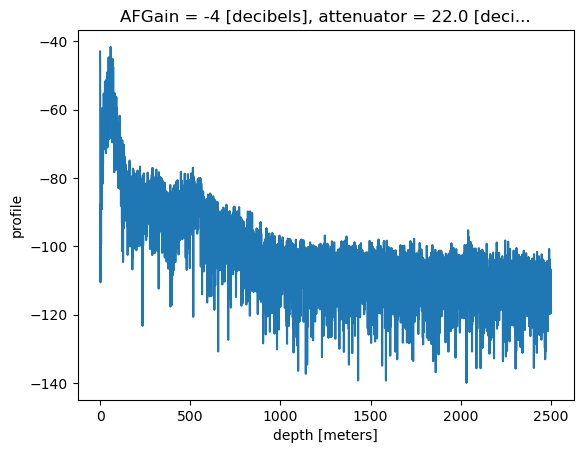

In [160]:
xapres_Loaded.isel(time=0, chirp_num=0).profile.xapres.dB2().plot()

In [145]:
xapres_Loaded.isel(time=0)

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 1, chirp_time: 40001,
                      chirp_num: 100, profile_range: 11889)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    burst_number     int64 dask.array<chunksize=(), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         <U90 dask.array<chunksize=(), meta=np.ndarray>
    orientation      <U7 dask.array<chunksize=(), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 2.5e+03 2.5e+03
    time             datetime64[ns] 2023-01-16T00:52:00
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  float64 dask.array<chunksize=(), meta=np.ndarray>
    chirp            (chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(40001, 10, 1), meta=np.ndarray>
    chirp_stacked    (chirp_time, attenuator_setting_pair) float64 dask.array<chunksize=(40001, 1), meta=np.ndarray>
    latitude         float64 dask.array<chunksize=(), meta=np.ndarray>
    longitude        float64 dask.array<chunksize=(), meta=np.ndarray>
    profile          (chirp_num, attenuator_setting_pair, profile_range) complex128 dask.array<chunksize=(10, 1, 11889), meta=np.ndarray>
    profile_stacked  (attenuator_setting_pair, profile_range) complex128 dask.array<chunksize=(1, 11889), meta=np.ndarray>
    temperature_1    float64 dask.array<chunksize=(), meta=np.ndarray>
    temperature_2    float64 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    constants:   {'B': 200000000, 'K': 200000000.0, 'c': 300000000.0, 'dt': 2...
    processing:  Created on 2024-10-21 15:30:22.044429

In [ ]:
import xarray as xr




@xr.register_dataarray_accessor("xapres")
class xapresAccessor:
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
       

    
    def load_dat(self):
        """Load data from a .dat file and return an xarray.dataset"""
        return 

    


    def dB(self):
        """
    A function to convert profile data to decibels.
    
    The function is added to xarray dataarrays as a bound method in two functions. 
    
    """
        return 20*np.log10(np.abs(self._obj)) 